Step 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_excel("T200-Public-Performance-Data-10-20V-September-2019.xlsx", sheet_name='12 V')
data

,PWM (µs),RPM,Current (A),Voltage (V),Power (W),Force (Kg f),Efficiency (g/W)
0,1100,2975.711667,17.031667,12,204.38,-2.903745,14.207466
1,1104,2968.960000,17.080000,12,204.96,-2.916597,14.230077
2,1108,2970.720000,16.760000,12,201.12,-2.893917,14.389006
3,1112,2932.790000,16.520000,12,198.24,-2.830414,14.277714
4,1116,2916.050000,16.080000,12,192.96,-2.785055,14.433328
...,...,...,...,...,...,...,...
196,1884,2936.810000,15.870000,12,190.44,3.569769,18.744849
197,1888,2962.320000,16.300000,12,195.60,3.637808,18.598200
198,1892,2976.440000,16.740000,12,200.88,3.705847,18.448062
199,1896,2993.650000,16.860000,12,202.32,3.692239,18.249500


In [4]:
y = data[" PWM (µs)"]
# convert to newton force
x = 9.80665*data[" Force (Kg f)"]

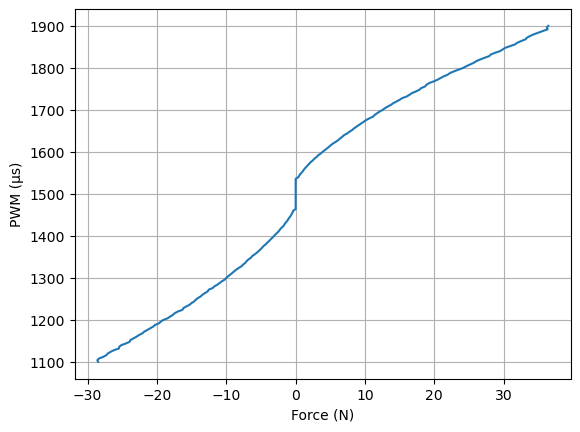

In [5]:
plt.plot(x, y)
plt.grid()
plt.xlabel("Force (N)")
plt.ylabel("PWM (µs)")
plt.show()

In [6]:
# positive side
model = LinearRegression().fit(x[x>0].to_numpy().reshape((-1, 1)), y[x>0].to_numpy())
m_p = model.coef_[0]
# b_p = model.intercept_
b_p = 1540

print("positive: mx + b: {}, {}".format(m_p, b_p))

# negative side
model = LinearRegression().fit(x[x<0].to_numpy().reshape((-1, 1)), y[x<0].to_numpy())
m_n = model.coef_[0]
# b_n = model.intercept_
b_n = 1460

print("negative: mx + b: {}, {}".format(m_n, b_n))



positive: mx + b: 9.446748332601718, 1540
negative: mx + b: 12.110367224497901, 1460


In [7]:
9.446748332601718*15/4 + 1568.1841920414354

1603.6094982886918

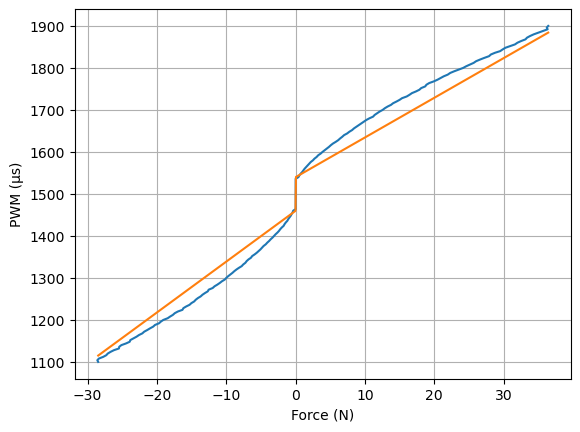

In [8]:
x_simp = np.linspace(x.to_numpy()[0], x.to_numpy()[-1], 1000)

plt.plot(x, y)
plt.plot(x_simp, np.where(x_simp > 0, m_p*x_simp + b_p, m_n*x_simp + b_n))
plt.grid()
plt.xlabel("Force (N)")
plt.ylabel("PWM (µs)")
plt.show()

In [33]:
# task 1
def cubicPoly(t, z_init, z_final, t_final):
    a_2 = 3*(z_final - z_init)/t_final**2
    a_3 = -2*(z_final - z_init)/t_final**3
    z_d = z_init + a_2*t**2 + a_3*t**3
    zdot_d = z_init + 2*a_2*t + 3*a_3*t**2
    if t > t_final:
        zdot_d = 0
        z_d = z_init + a_2*t_final**2 + a_3*t_final**3
        
    return z_d, zdot_d

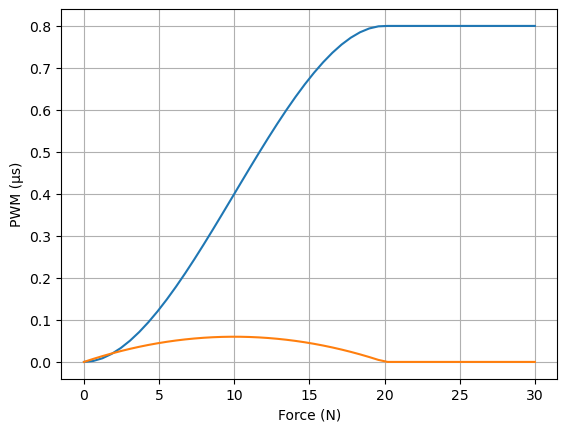

In [34]:
T = np.linspace(0, 30)
z_init = 0
z_final = 0.8

z = [cubicPoly(t, z_init, z_final, 20) for t in T]
plt.plot(T, z)
plt.grid()
plt.xlabel("Force (N)")
plt.ylabel("PWM (µs)")
plt.show()
# T[-1]

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file into a pandas DataFrame
file_name = "2step52_1_slash_br5_slash_angle_degree.csv"
df = pd.read_csv('logs/data_measurements/' + file_name)

df.head()

,rosbagTimestamp,linear,x,y,z,angular,x.1,y.1,z.1
0,1680270618555742711,NaN,0.0,0.0,0.0,NaN,-0.760224,0.420742,-167.153077
1,1680270618571365426,NaN,0.0,0.0,0.0,NaN,-0.798926,0.444413,-167.138801
2,1680270618590493055,NaN,0.0,0.0,0.0,NaN,-0.831658,0.466667,-167.124417
3,1680270618605180569,NaN,0.0,0.0,0.0,NaN,-0.855602,0.482767,-167.111631
4,1680270618619639657,NaN,0.0,0.0,0.0,NaN,-0.874180,0.495873,-167.098353


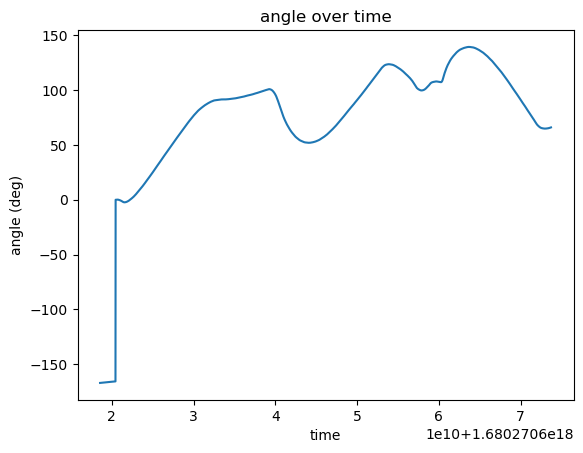

In [41]:
# Create a line graph using matplotlib
plt.plot(df['rosbagTimestamp'], df['z.1'])

# Add title and labels to the graph
plt.title('angle over time')
plt.xlabel('time')
plt.ylabel('angle (deg)')

# Show the graph
plt.show()